<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Lab 7.1: Data Exploration II (Multivariate Data)

### Submission Instructions

* Complete the following questions and upload your `.ipynb` file to Coursemology.
* Name the file in the following format: `Lab<num><YourName>.ipynb`
* Before submitting, please ensure you click on "Kernel" > "Restart and Run All" on your jupyter notebook. 
* Finally, print a copy of your final solution to OneNote > Your Individual Student Notebook > Labs. Name the page `Lab <num>`.

## Q1

In this question, we will use the dataset found in Lab7iQ1.csv.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Lab7iQ1.csv')
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


#### a) Use a stripplot to visualize the life expectancy data grouped by continents.

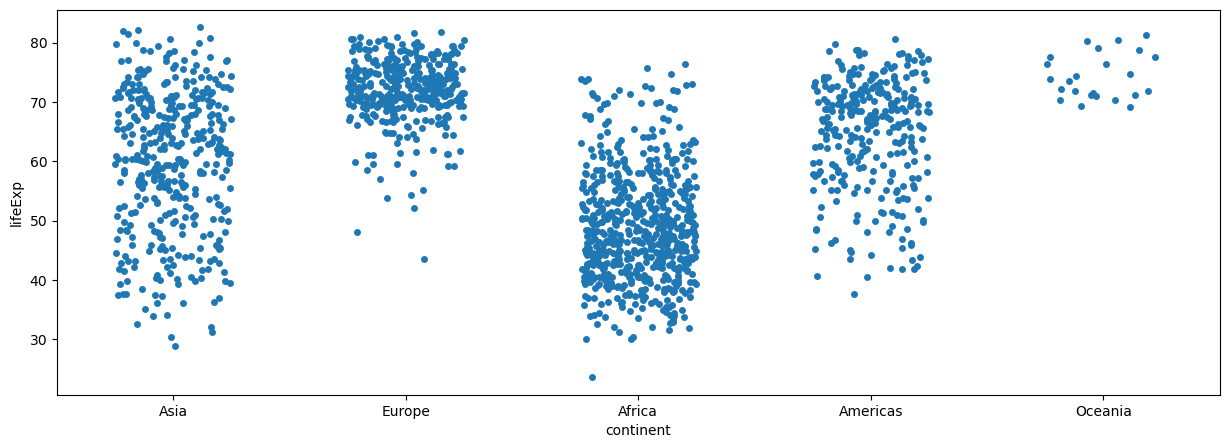

In [48]:
#your solution
plt.figure(figsize = (15, 5))
sns.stripplot(y = df["lifeExp"], x = df["continent"], data = df, jitter = 0.25)
plt.show()

Hence, comment on the spread of the respective distribution for the respective continents.

<div class="alert alert-block alert-info">

- For Asia and America, the distrubution is has a wide range. Asia has a relatively symmetric but America is slightly left skewed. America has a smaler range than Asia.
- For Oceania, there is a small range that is left skewed. It also has an abnormally low number of data points
- For Euripe, it has a small range and is left skewed
- For Africa, it has a wide range that is right skewed
    
</div>

#### b) Use a swarmplot to visualize the life expectancy data grouped by continents for year 2007 and 50 years ago.

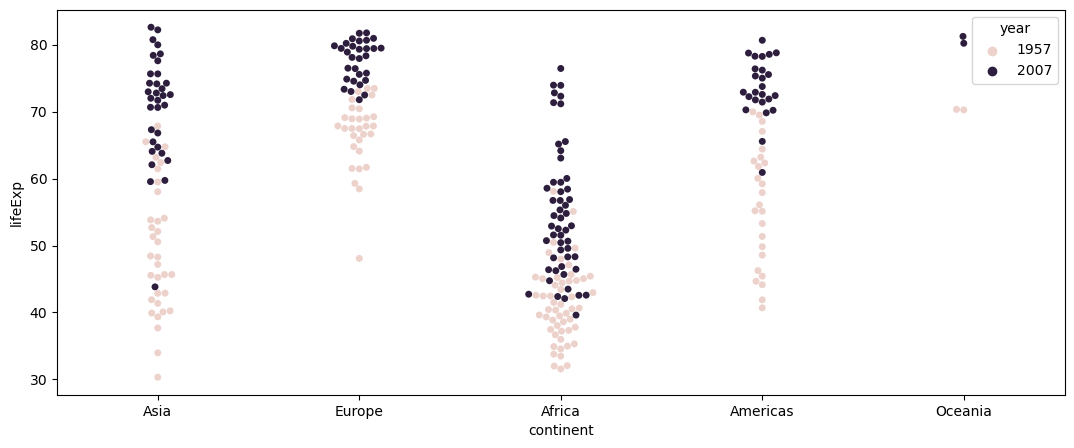

In [49]:
#your solution
plt.figure(figsize = (13, 5))
inp = df[(df.year.astype(int) == 2007) | (df.year.astype(int) == (2007 - 50))]
sns.swarmplot(hue = inp["year"], y = inp["lifeExp"], x = inp["continent"], data = inp)
plt.show()

Hence, compare the life expectancy for 2007 and 50 years ago across the respective continents.

<div class="alert alert-block alert-info">

- For Oceania, Asia, America and Europe, the average and (estimated) median life expectency is higher in 2007 than 50 years before that. However, for Oceania, there is a significant lack of data points so it is hard to confirm whether the conclusion is accurate.
- For Africa, the (estimated) mean life expectency is higher in 2007 as compared to 50 years before that

In general, the life expectency of every continent is higher in 2007 as compared to that 50 years before
    
</div>

#### c) Plot a side by side boxplot for life expectancy and continent.

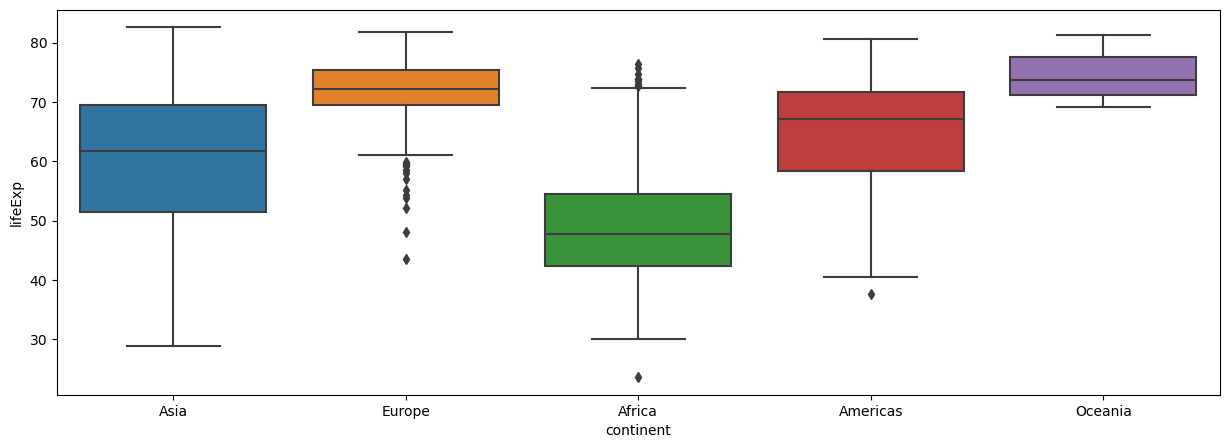

In [50]:
#your solution
plt.figure(figsize = (15, 5))
sns.boxplot(y = df["lifeExp"], x = df["continent"],  data = df)
plt.show()

Hence, compare the distribution of life expectancy in the respective continents.

<div class="alert alert-block alert-info">

Aside from the points listed in previous parts:

* Central tendencies
    * Oceania and Europe has highest median life expectency, followed by America, Asia than Africa

- Spread 
    - Europe and Oceania have relatively much smaller IQR while Africa and America has a larger IQR. Asia has the largest IQR relative to all other continents

* Outliers:
    * Europe has many outliers that are lower than excpected
    * Africa and America has one outlier that lower than expected
    * Africa has a few outliers that are higher than expected
    
</div>

#### d) Plot a side by side violinplot for life expectancy and continent.

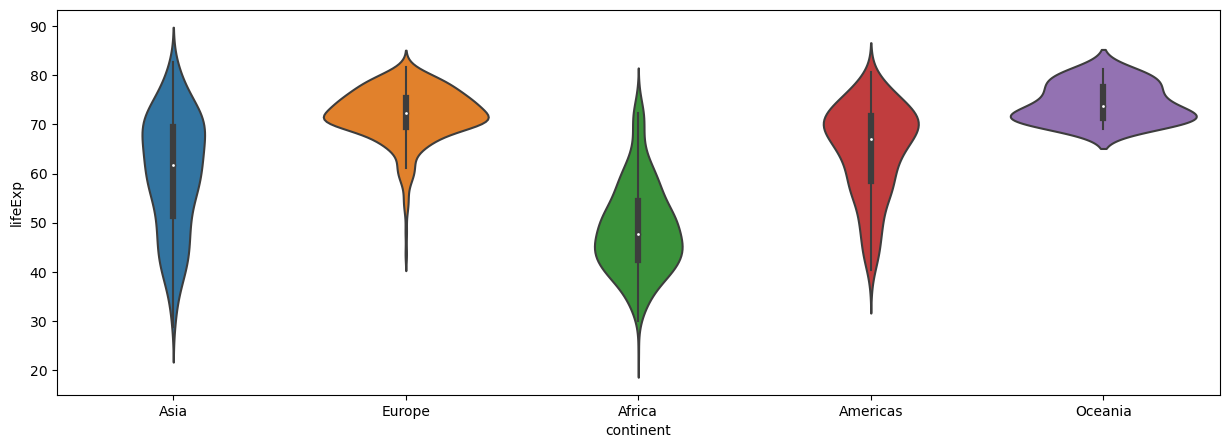

In [51]:
#your solution
plt.figure(figsize = (15, 5))
sns.violinplot(y = df["lifeExp"], x = df["continent"], data = df)
plt.show()

What different insights could be drawn from the violinplot compared to the boxplot?

<div class="alert alert-block alert-info">

You are unable to conclude whether there are outliers and how many outliers there are in a violinplot, but you can see the frequency of each value.
    
</div>

#### e) We would like to compare the life expectancy by contintent, for every 10 years until 2007. Draw a grouped boxplot for the comparison. 

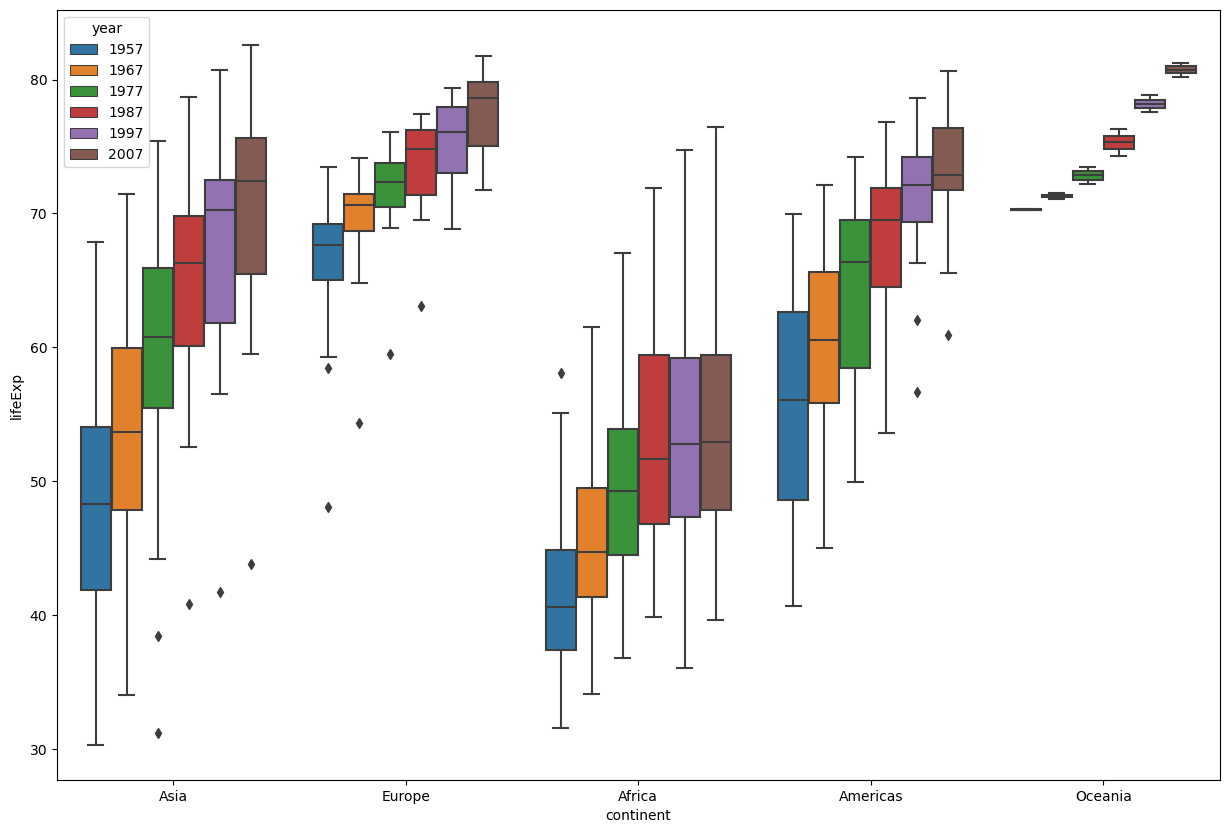

In [52]:
#your solution
plt.figure(figsize = (15, 10))
inp = df[((2007 - df.year.astype(int)) % 10 == 0)]
sns.boxplot(y = inp["lifeExp"], x = inp["continent"], data = inp, hue = 'year')
plt.show()

Hence, compare the distribution of life expectancy in the respective continents over the years.

<div class="alert alert-block alert-info">

All of them are unimodal

- For Asia, it becomes progressively more left skewed over the decades, the IQR decreases, there is an outlier in every decade except the first 2 decades, and the third decade where there are 2 outliers. All outliers are lower than expected
- For Europe, every decade has a left skew and the IQR decreases then increases over the decades. There are 2 outliers in the first decade and 1 outlier in each of the 3 subsequent decades. All outliers are lower than expected
- For Africa, there is a right skew and the IQR increases over the decades. There is one outlier in the first decade and is higher than expected
- For America, ther is a left skew and IQR decreases over the decades. There is one outlier in the last recorded decade and 2 in the decade before. All outliers are lower than expected.
- For Oceania, it is hard to determine anything apart from the fact that the IQR increases over the decades and there are no outliers

</div>

####  f) We would like to compare the average GDP per capital for the following places: Singapore, Japan, Hong Kong China, Korea Rep. Use a pointplot to visualize this.

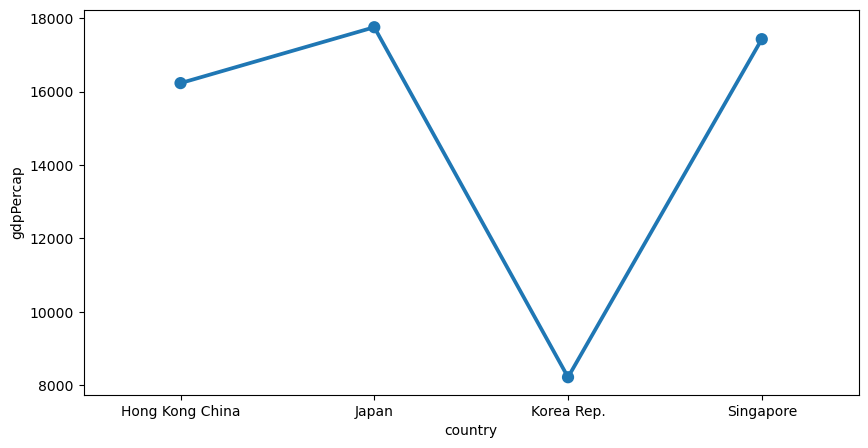

In [53]:
#your solution
plt.figure(figsize = (10, 5))
inp = df[df.country.isin(["Singapore", "Japan", "Hong Kong China", "Korea Rep."])]
final_inp = inp.reset_index().drop(columns = ["year", "pop", "lifeExp", "continent", "index"]).groupby("country").agg('mean').reset_index()
sns.pointplot(x = 'country', y = 'gdpPercap', data = final_inp)
plt.show()

In a typical pointplot, there is an option to show or do not show error bars. Research on what is the significance of these error bars in pointplot.

<div class="alert alert-block alert-info">

The error bar, like for ploted graphs for other sciences show the the estimated uncertainty of each value to show how precise it is.
It can also show the spread of data of the distribution.

</div>

Write down your observations from the pointplot below. 

<div class="alert alert-block alert-info">

The mean GDP of Korea Rep. over the years is significantly lower than the other 3 countries
    
</div>

Now plot a boxplot instead.

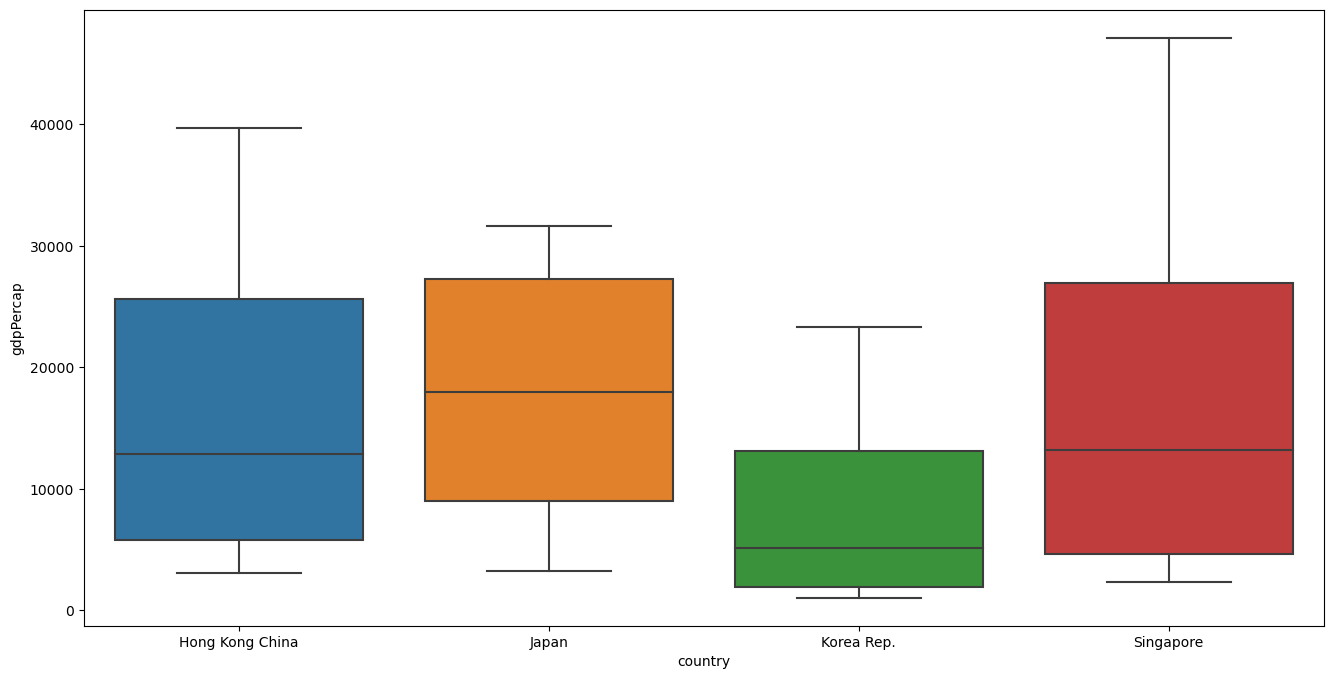

In [54]:
#your solution
plt.figure(figsize = (16, 8))
inp = df[df.country.isin(["Singapore", "Japan", "Hong Kong China", "Korea Rep."])]
sns.boxplot(x = 'country', y = 'gdpPercap', data = inp)
plt.show()

Compare the insights gained from the pointplot vs that from the boxplot. Which visualization do you think is better or more effective in this case? Justify your answer clearly.

<div class="alert alert-block alert-info">

The distribution for Korea Rep. is the narrowest and the distribution for Singapore is the highest.

The boxplot is better since we are not observing trends over time but rather comparing values between different categories (countries).
    
</div>

####  g) We would like to compare the changes in the GDP per capital for the following places: Singapore, Japan, Hong Kong China, Korea Rep over the years. Use a pointplot to visualize this.

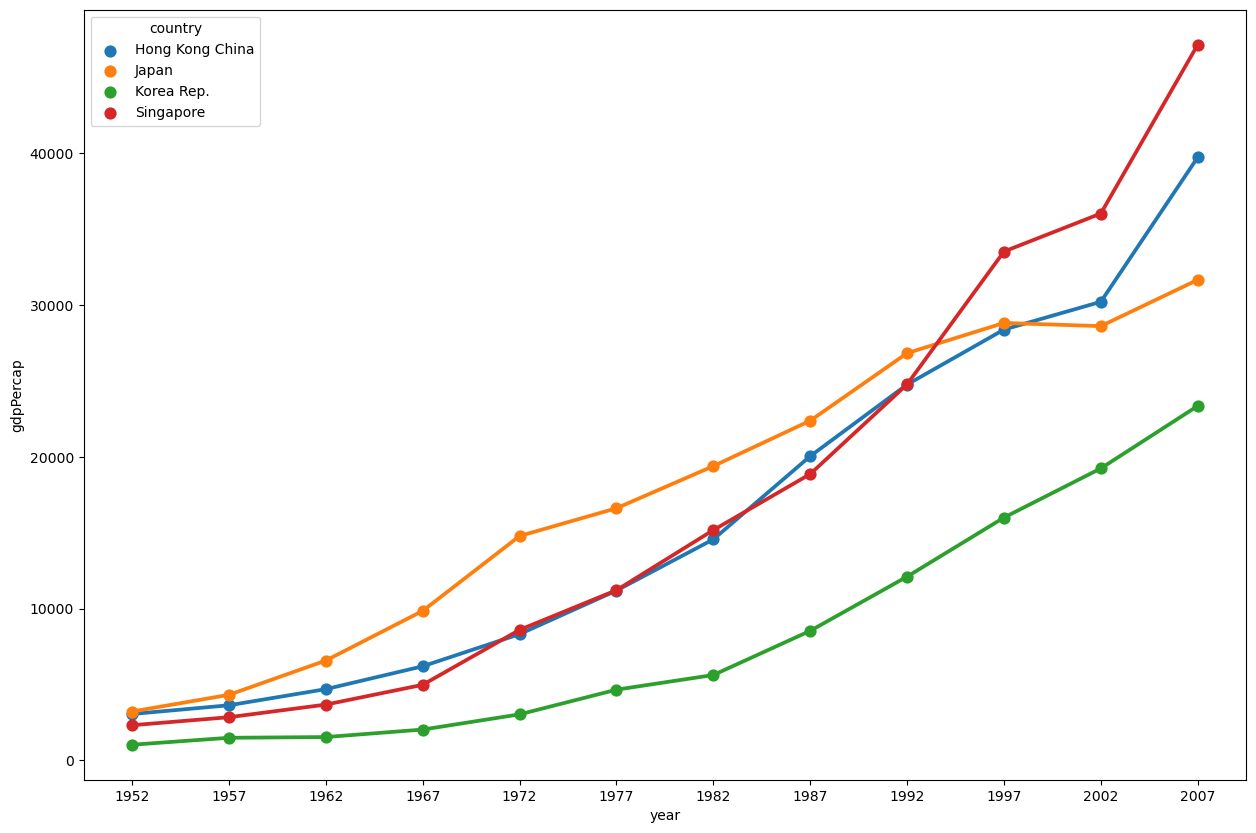

In [55]:
#your solution
plt.figure(figsize = (15, 10))
sns.pointplot(x = 'year', y = 'gdpPercap', hue = "country", data = df[df.country.isin(["Singapore", "Japan", "Hong Kong China", "Korea Rep."])])
plt.show()

Do you think a boxplot would be effective in this case compared to a pointplot? Justify your answer clearly.

<div class="alert alert-block alert-info">

No. We are looking for trends over time in this question so pointplot is more appropriate.
    
</div>

#### h) We would like to visualize how the total population had changed over the years, and how the total population is distributed among the continents over time. Plot a stacked bar graph for this.

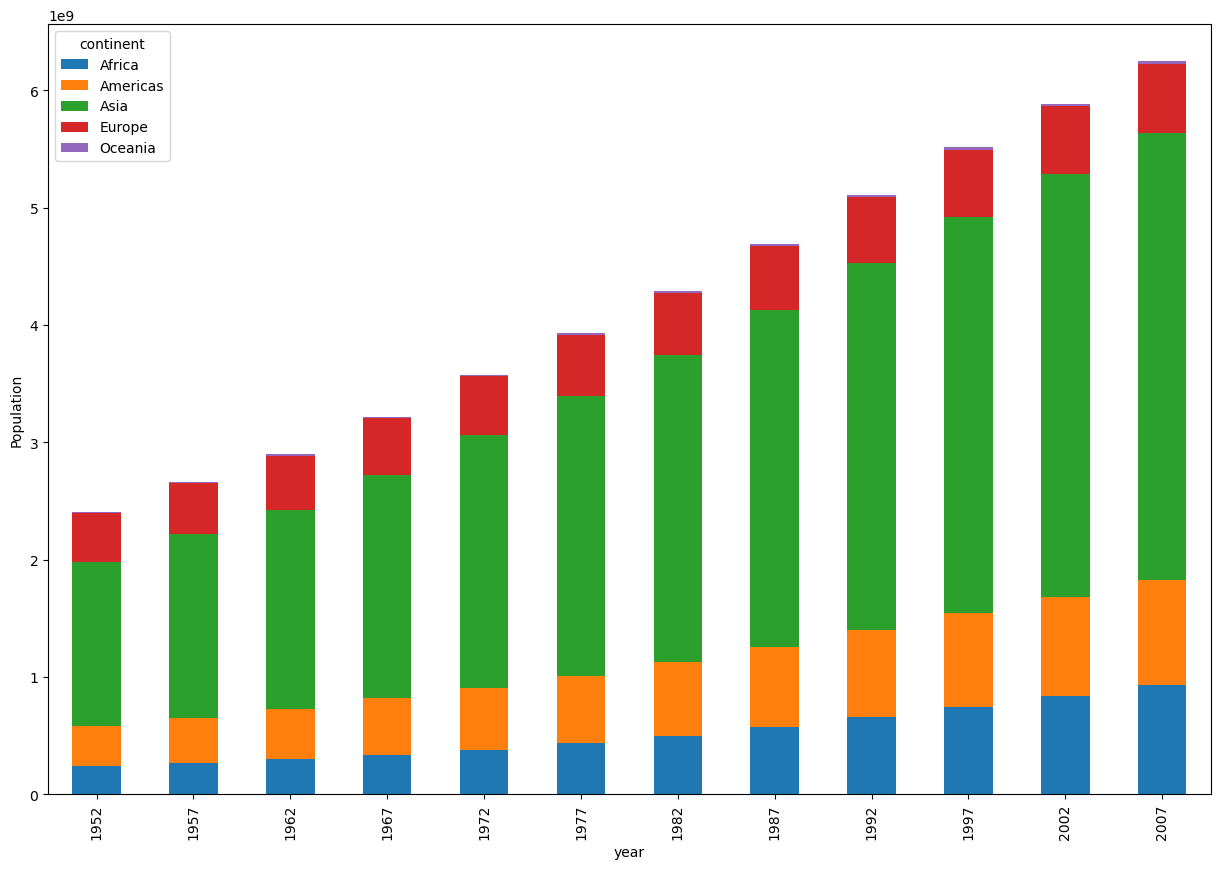

In [56]:
#your solution
df['pop'] = df['pop'].astype(int)
df['gdpPercap'] = df['gdpPercap'].astype(float)
inp = df.drop(columns = ['country', 'lifeExp', 'gdpPercap']).groupby(['continent', 'year']).sum().reset_index()
inp = inp.pivot(index = "year", columns = "continent", values = "pop")
inp.plot(kind = 'bar', stacked = True, figsize = (15, 10))
plt.ylabel("Population")
plt.show()

Briefly justify why a stacked bar graph is suitable for this scenario.

<div class="alert alert-block alert-info">

We want to find the proportion of each countries population over the total population in a specific year, over the years.
    
</div>

Hence, state what observations and insights could be drawn from the stacked bar graph.

<div class="alert alert-block alert-info">

- The population of each continent increased over the years
- The total population increased over the years
- The proportion of Oceania's population to the total population is the lowest, and the proportion of Asia's population to the total population is the highest
    
</div>

#### i) Suggest a suitable question to investigate on (and not already covered) where a grouped bar chart would be suitable.

<div class="alert alert-block alert-info">

type your question here

**How has total GDP across all the continents changed over the years, and how has GDP distributed between continents over time?**
    
</div>

Hence, plot the grouped bar chart.

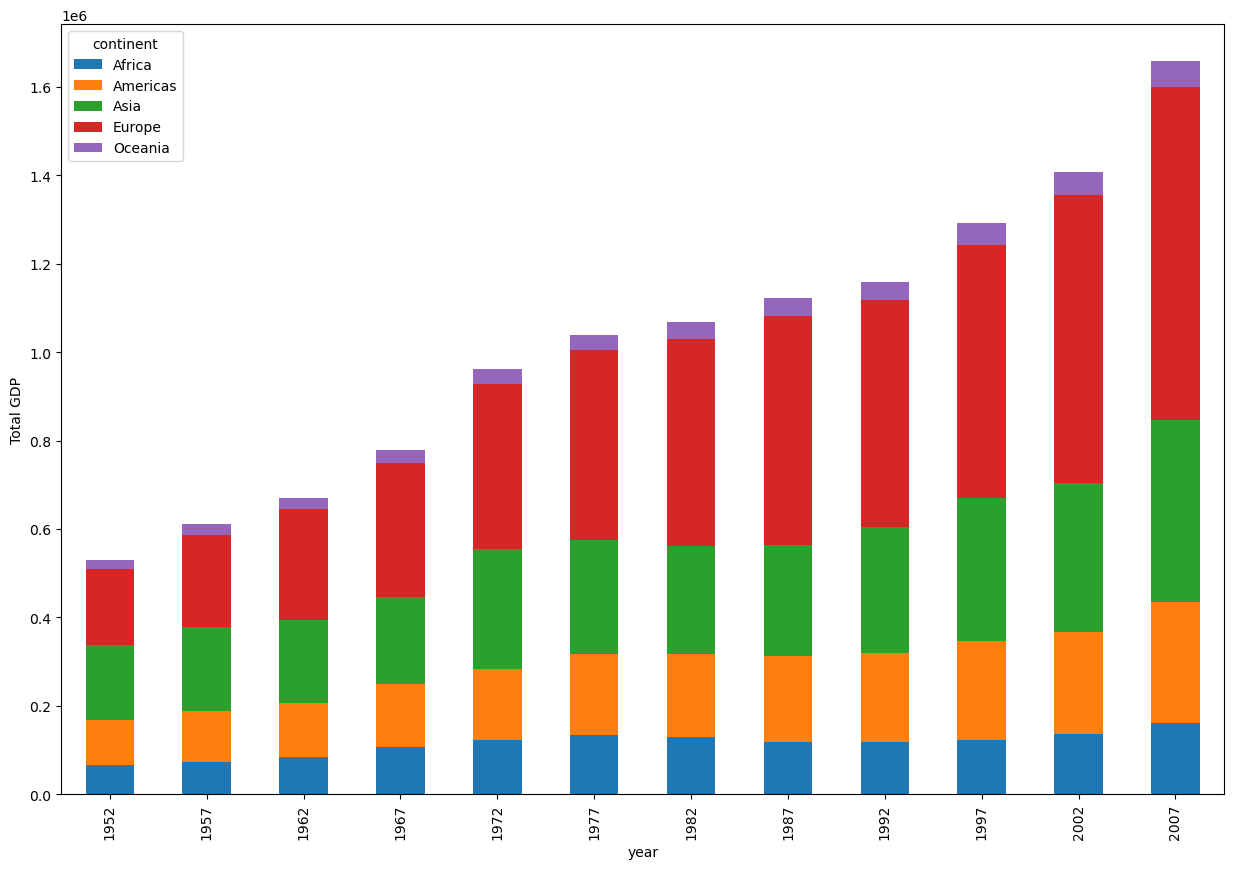

In [57]:
inp = df.drop(columns = ['country', 'lifeExp', 'pop']).groupby(['continent', 'year']).sum().reset_index()
inp = inp.pivot(index = "year", columns = "continent", values = "gdpPercap")
inp.plot(kind = 'bar', stacked = True, figsize = (15, 10))
plt.ylabel("Total GDP")
plt.show()

Hence, state what observations and insights could be drawn from the grouped bar chart.

<div class="alert alert-block alert-info">

- The GDP of each continent increased over the years
- The total GDP increased over the years
- The proportion of Oceania's GDP to the total GDP is the lowest, and the proportion of Europe's GDP to the total GDP is the highest, which is different from population where Asia is the highest
    
</div>